In [ ]:
"""
to do:
- add table of contents
- fix title numbering issue
- check if any online place for interactive viewing, else use html file if possible and remove widget (use bin width set as default), or add comments for interactive histograms
"""

In [1]:
%%html
<style>
p {
    max-width: 45em;
    word-wrap: break-word;
    }
li{
    max-width: 40em;
    word-wrap: break-word;
    margin:0 0 5px 0;
    }
</style>

<br>
<p style="text-align:center; font-family: Arial; max-width: 65em">
    <font size=6>Exploratory Data Analysis in Python</font>
    <br>
    <br></p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Dataset-overview" data-toc-modified-id="Dataset-overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset overview</a></span><ul class="toc-item"><li><span><a href="#Numerical-variables:-descriptive-statistics-and-distribution" data-toc-modified-id="Numerical-variables:-descriptive-statistics-and-distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Numerical variables: descriptive statistics and distribution</a></span></li><li><span><a href="#Categorical-variables:-descriptive-statistics-and-distribution" data-toc-modified-id="Categorical-variables:-descriptive-statistics-and-distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Categorical variables: descriptive statistics and distribution</a></span></li></ul></li><li><span><a href="#Numerical-variables-relationships" data-toc-modified-id="Numerical-variables-relationships-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Numerical variables relationships</a></span></li><li><span><a href="#Numerical-categorical-relationships" data-toc-modified-id="Numerical-categorical-relationships-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Numerical-categorical relationships</a></span></li><li><span><a href="#Categorical-variables-relationships" data-toc-modified-id="Categorical-variables-relationships-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Categorical variables relationships</a></span></li><li><span><a href="#Further-analysis" data-toc-modified-id="Further-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Further analysis</a></span><ul class="toc-item"><li><span><a href="#Question-1---Men-vs-women-tip-rate" data-toc-modified-id="Question-1---Men-vs-women-tip-rate-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Question 1 - Men vs women tip rate</a></span></li><li><span><a href="#Question-2---Smoker-vs-non-smoker-parties-tip-rate" data-toc-modified-id="Question-2---Smoker-vs-non-smoker-parties-tip-rate-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Question 2 - Smoker vs non-smoker parties tip rate</a></span></li><li><span><a href="#Question-3---Impact-of-tip-rate-decrease-with-size-of-party" data-toc-modified-id="Question-3---Impact-of-tip-rate-decrease-with-size-of-party-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Question 3 - Impact of tip rate decrease with size of party</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

The goal of this notebook is to illustrate the process of exploratory data analysis (EDA) with Jupyter Notebook using Python. Carrying out an EDA using Jupyter Notebook has several advantages over spreadsheet software like Microsoft Excel:
- The data analysis process is presented in its entirety, in chronological order and in a readable way thanks to the inclusion of comments between data processing steps.
- The original dataset can be updated and the analysis can be repeated without any changes having to be made.
- A new dataset containing similar types of variables can be analyzed using the same notebook requiring only a few changes in variable names, which is easily done using the convenient find and replace utility.

These features make Jupyter Notebook an ideal tool to carry out, share and reproduce data analyses.

This notebook demonstrates how easy it is to get an overview of a clean dataset and to visualize and identify relationships between variables in a dataset using a systematic approach. This is why a sample dataset contained in a Python package will be used rather than extracting a raw dataset from a primary source seeing as accessing and preparing a dataset for analysis often constitutes the bulk of the work.
  
Several functions are created in this notebook to significantly improve on existing plotting functions and make it easier to quickly review the data. Of course writing these functions initially takes a bit of time, but the point is that they can be easily reused on any other dataset and packaged into a module and they are all that is needed to get a quick and complete overview of all the variables contained in the dataset.

It is also worth noting here that there exists at least two Python packages that offer tools for EDA that are worth checking out: [Pandas Profiling](https://pypi.org/project/pandas-profiling/) and [Sweetviz](https://pypi.org/project/sweetviz/).

In [1]:
# import packages and set package parameters
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from math import sqrt, floor, ceil
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.rcParams['figure.figsize'] = (10,6) # set default figure size in inches (width, height)
import numpy as np
import pandas as pd
pd.set_option('precision',2)
import seaborn as sns
import ipywidgets as wgt
from ipywidgets import interact, fixed

The *seaborn* package contains several built-in sample datasets listed below. Other built-in datasets can be accessed with the *statsmodels* and *scikit-learn* packages. Furthermore, [*statsmodels*](https://www.statsmodels.org/dev/datasets/index.html) also provides easy access to R datasets through the [Rdatasets project](https://github.com/vincentarelbundock/Rdatasets) and the [*vega_datasets*](https://github.com/jakevdp/vega_datasets) package provides offline access to the collection of datasets used in Vega and Vega-lite examples.

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

To carry out this illustrative EDA, the *tips* dataset will be used as an example since it contains numerical continuous, numerical discrete and categorical variables making it a perfect basis to explore the capabilities of Python for exploring relationships between different types of variables. This dataset is also included in the [Rdatasets collection](https://vincentarelbundock.github.io/Rdatasets/doc/reshape2/tips.html) with the following description:

"One waiter recorded information about each tip he received over a period of a few months working in one restaurant. He collected several variables:
- tip in dollars,
- bill in dollars,
- sex of the bill payer,
- whether there were smokers in the party,
- day of the week,
- time of day,
- size of the party.

In all he recorded 244 tips. The data was reported in a collection of case studies for business statistics:  
Bryant, P. G. and Smith, M (1995) *Practical Data Analysis: Case Studies in Business Statistics*. Homewood, IL, USA: Richard D. Irwin Publishing."

The restaurant's location is unfortunately not provided, but considering the publisher's location, it is safe to assume that it is somewhere in the United States and therefore the currency is in US dollars.

Obviously, the *tip* variable is of most interest as the outcome variable and the main objective is to understand how the other variables measured influence it. But the purpose of this EDA is primarily to apply a systematic approach to analyze all variables on an equal footing so that no major feature is missed, seeing as an excessive focus on the outcome variable may prevent the uncovering of interesting relationships between other variables.

The systematic part of this EDA is carried out in sections 2 to 5. It is this part that can easily be reused with any other dataset containing variables of similar types. Part 6 explores the *tips* dataset further, investigating features uncovered in the systematic part.

# Dataset overview

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


These two tables show that this dataset does not require any further preparation before analysis, there are no missing values and the variables as well as the values of categorical variables are all named clearly.

The dataset contains variables of different types of level of measurement:
- numerical continuous: *total_bill*, *tips*
- numerical discrete: *size*
- categorical: *sex*, *smoker*, *day*, *time*

The next steps involve looking at some key descriptive statistics describing these variables and visualizing how the scores of each variable are distributed.

## Numerical variables: descriptive statistics and distribution

In [5]:
tips.describe()

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


The range of bill totals does not exceed about \\$50 which appears rather low, even accounting for the additional service charge paid as tips, considering that it is a restaurant with parties going up to 6 people. Indeed, prices were certainly lower compared to today's standard due to inflation, [for example](https://www.in2013dollars.com/Food/price-inflation/1995-to-2020?amount=20) food priced at \\$20 in 1995 would cost close to \\$36 in 2020. Furthermore, information about the location and the type of restaurant is missing.

Tips do not go below \\$1 which is understandable seeing as tips are part of the [wage of waiters and waitresses](https://en.wikipedia.org/wiki/Tipped_wage) in the United States, it is expected that customers give a tip of [15-20% of the bill](https://relocateusa.com/tipping-etiquette-in-the-united-states/).

The size of parties ranges from 1 to 6 people. As it is a numerical discrete variable containing only 6 unique values, it will be regarded as a categorical variable for visualization purposes in most sections of this EDA.

Taking a closer look at the distribution of numerical variables can sometimes provide more insights. Below are plotted the histograms for the *total_bill* and *tip* variables. The default histogram functions in the matplotlib and seaborn packages automatically group the variable scores into 10 bins, a number which can easily by modified but there is the issue that the bins do not automatically align with round values of the variable's unit of measurement.

For this reason, a function is created here which automatically creates bins that are aligned with round values based on a bin width that is selected using a widget. This makes it easier to change the bins and to read the histogram. A [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation) is also included to visualize the probability density. This can be useful for statistical inference purposes where it is important to know whether or not the distribution is close to normal, or whether it may correspond to another type of theoretical distribution.

In [8]:
# create interactive widget using decorator that uses the function defined below
# and allows the selection of the width of the histogram bins
@interact(variable=fixed(tips['total_bill']),
          xlabel=fixed('Bill total'),
          ylabel=fixed('Count'),
          title=fixed('Distribution of bill totals'),
          bins_width=wgt.IntText(value=5, step=1, # select default bin width and widget incremental change
                                 description='Bins width (US dollars)',
                                 style = {'description_width': 'initial'}))

# create histogram function
def hist_interact(variable, xlabel, ylabel, title, bins_width):
    """
    Create a histogram with bins of a selected width and overlaid with a kernel
    density estimator.
    
    A list of bins for the histogram 'bins' argument is created based on the
    range of the variable scores and on the selected width of bins. The bins are
    automatically aligned with round units making the histogram more readable.
    
    Parameters
    ----------
    variable: pandas Series, numpy 1d-array, or list
        List of values to plot in histogram.
    xlabel: str
        Label x axis.
    ylabel: str
        Label y axis.
    title: str
        Figure title.
    bins_width: integer, float
        Width of histogram bins in the units of the variable.
    """
    
    # create list of bins based on the range of values of the variable
    if np.log10(max(variable)-min(variable)) <= 1:
        exponent = ceil(np.log10(max(variable)))
        start = 0
        stop = 10**exponent
    else:
        exponent = floor(np.log10(max(variable)-min(variable)))
        start = floor(min(variable)/10**exponent)*10**exponent
        stop = ceil(max(variable)/10**exponent)*10**exponent + bins_width

    bins_range = np.arange(start, stop, bins_width)
    bins_list = bins_range[(bins_range >= min(variable)-2*bins_width) & (bins_range <= max(variable)+2*bins_width)]
    
    # draw seaborn histogram
    ax_hist = sns.distplot(variable, bins=bins_list, kde=False,
                           hist_kws={'alpha': 0.9, 'edgecolor': (0.25, 0.25, 0.25), 'linewidth': 1})
    
    # draw seaborn kde plot on top of histogram with new ax to preserve histogram y axis scale
    # note: code to be updated once anaconda updates seaborn package to v0.11 where histplot function simplifies this issue
    ax_kde = ax_hist.twinx()
    sns.kdeplot(variable, ax=ax_kde, color='black', alpha=0.5, linewidth=1.5, label='kernel density estimator')
    ax_kde.set_yticks([])
    
    # additional formatting
    ax_hist.set_xlabel(xlabel, size=12, labelpad=15)
    ax_hist.set_ylabel(ylabel, size=12, labelpad=15)
    plt.title(title, size=14, pad=30)
    plt.legend(frameon=False)
    sns.despine()

interactive(children=(IntText(value=5, description='Bins width (US dollars)', style=DescriptionStyle(descripti…

In [9]:
interact(hist_interact,
         variable=fixed(tips['tip']),
         xlabel=fixed('Tip'),
         ylabel=fixed('Count'),
         title=fixed('Distribution of tips'),
         bins_width=wgt.FloatText(value=0.5, step=0.25,
                                  description='Bins width (US dollars)',
                                  style = {'description_width': 'initial'}));

interactive(children=(FloatText(value=0.5, description='Bins width (US dollars)', step=0.25, style=Description…

As could be expected, tips are usually rounded at the nearest dollar. (The bins are left inclusive.)

## Categorical variables: descriptive statistics and distribution

The *size* variable is numerical discrete, containing only 6 unique values, so it will be regarded as a categorical variable in this section.

In [9]:
# size data type is converted to str using lambda function to avoid creating a copy of the dataframe only for this table
tips.assign(size=lambda tips: tips['size'].apply(str)).describe(exclude=[np.number])

,sex,smoker,day,time,size
count,244,244,244,244,244
unique,2,2,4,2,6
top,Male,No,Sat,Dinner,2
freq,157,151,87,176,156


3 out of 4 of the categorical variables are binary and each of these have one score that clearly outweighs the other, as shown in more detail in the distributions printed below.

In [10]:
# print counts of unique values of categorical variables and numerical discrete variables with fewer than 10 unique values
nb_unique_limit=10
for variable in tips:
    if len(tips[f'{variable}'].unique()) <= nb_unique_limit:
        print(f'{tips[{variable}].value_counts()}\n')

sex   
Male      157
Female     87
dtype: int64

smoker
No        151
Yes        93
dtype: int64

day 
Sat     87
Sun     76
Thur    62
Fri     19
dtype: int64

time  
Dinner    176
Lunch      68
dtype: int64

size
2       156
3        38
4        37
5         5
6         4
1         4
dtype: int64



The distribution of categorical variables can also be visualized with bar charts. It is also useful to represent numerical discrete variables in this way when they contain few unique values, such as in the case of the variable *size*.

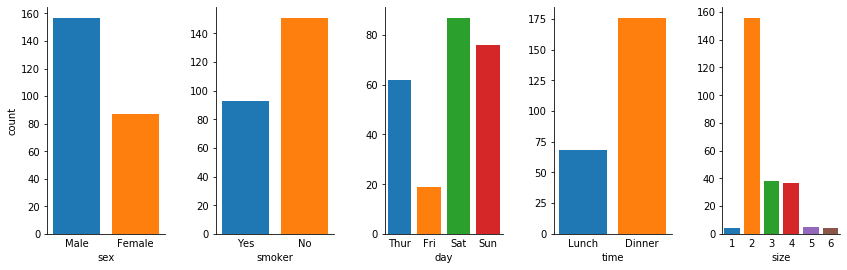

In [11]:
def bar_sbs(df, nb_unique_limit=10):
    """
    Create side-by-side bar charts of all categorical and numerical discrete
    variables within dataset than contain a number of levels less or equal
    to the selected limit of unique values.
    
    Parameters
    ----------
    df: pandas DataFrame
        DataFrame containing categorical and/or numerical discrete variables.
    nb_unique_limit: integer, default=10
        Number of unique values used as a cut-off to maintain chart readability.
    """
    
    # select variables to plot
    var_cat = df[[variable for variable in df if len(df[variable].unique()) <= nb_unique_limit]]
    ncols = len(var_cat.columns)
    
    # create figure with required number of subplots
    fig, axes = plt.subplots(1, ncols, figsize=(12, 4))
    fig.tight_layout(pad=2)
    sns.despine()
    
    # draw seaborn bar charts
    for i, var in enumerate(var_cat):
        sns.countplot(x=var_cat[var], saturation=1, ax=axes[i])
        axes[i].tick_params(which='major', axis='x', length=0, pad=5)
        if i > 0:
            axes[i].set(ylabel='')

bar_sbs(tips)

Key observations:
- Men pay the bill about twice as often as women.
- The number of observations varies greatly between days and meal time, which could be due to different factors such as the waiter's shifts, restaurant opening hours, or customer habits.
- Parties most often number 2 people, less often 3 or 4 people, and rarely 1, 5 or 6.

This marks the end of the initial overview of the dataset. Now that we have a good idea of the types of variables in our dataset and of their distribution, it is time to examine whether or not there are any apparent relationships between them.

This is done in the following sections by systematically visualizing all variables in different types of data graphics depending on the level of measurement of each variable. The numerical discrete variable *size* is visualized both as a numerical and as a categorical variable.

# Numerical variables relationships

The relationships between numerical variables can be conveniently visualized with a grid of scatter plots using the seaborn package.

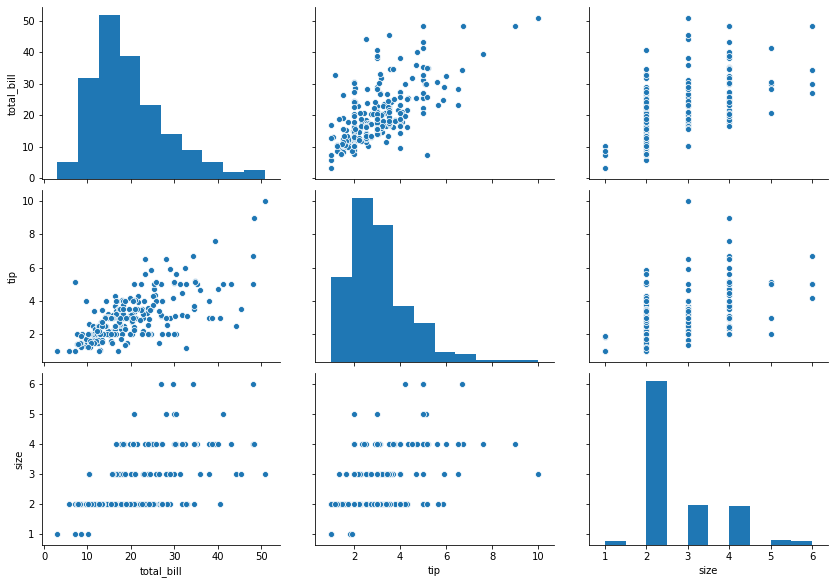

In [12]:
sns.pairplot(tips)
plt.gcf().set_size_inches(12,8);

The histograms in the diagonal show that all three numerical variable in this dataset are right-skewed. The scatter plots show that tips are positively associated with bills, as are bills with the size of the party. The *tip* vs *total_bill* scatter plot shows that there are more points in the lower right than the upper left. This means people are more often not so generous with their tip, the tips do not increase proportionaly to the bill in a constant way.

Seeing as the dataset contains three categorical variables with just two levels (*sex*, *smoker*, *time*) it can be interesting to look at how these groups are distributed in these scatter plots. Doing this for variables with more than two groups is rarely useful as readability decreases, for those cases it is better to use boxplots (see further below) or scatter plots drawn as small multiples (also known as 'trellis' or 'lattice' graphs).

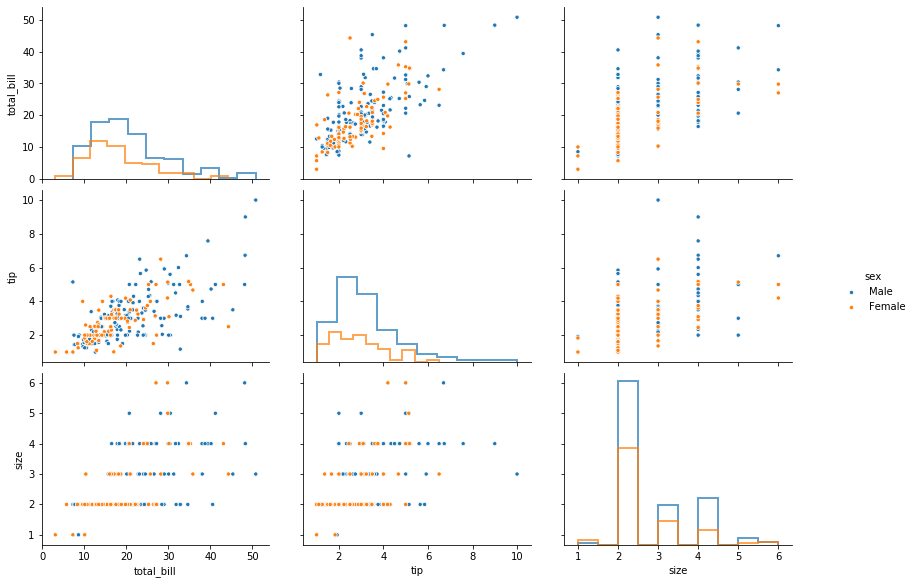

In [13]:
sns.pairplot(tips, hue='sex',
             plot_kws={'size': 10}, # change size of dots
             diag_kind='hist',
             diag_kws={'histtype': 'step', 'linewidth': 2, 'alpha': 0.7})
plt.gcf().set_size_inches(13,8);

It seems that men give larger tips than women probably due to the fact that they pay larger bills more frequently. Indeed, bills of parties of 4 are more often paid by men relative to the male/female ratio of party sizes of 2 and 3. A possible explanation is that these parties may often be families where men take on the responsibility of making payments.

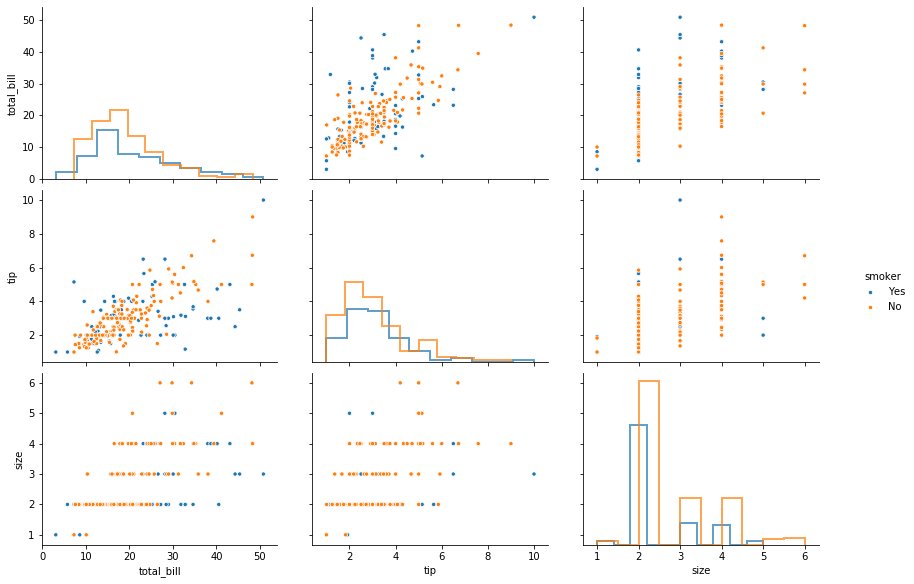

In [14]:
sns.pairplot(tips, hue='smoker',
             plot_kws={'size': 10},
             diag_kind='hist',
             diag_kws={'histtype': 'step', 'linewidth': 2, 'alpha': 0.7})
plt.gcf().set_size_inches(13,8);

From the *tip* vs *total_bill* scatter plot, it appears that parties with at least one smoker that have a large bill to pay tend to tip less generously on average than non-smoker parties paying bills of a similar amount.

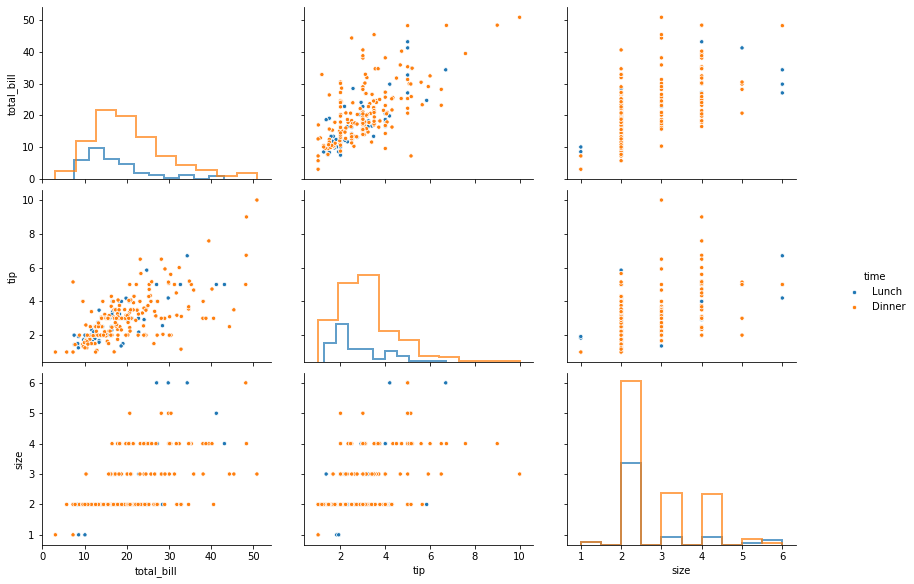

In [15]:
sns.pairplot(tips, hue='time',
             plot_kws={'size': 10},
             diag_kind='hist',
             diag_kws={'histtype': 'step', 'linewidth': 2, 'alpha': 0.7})
plt.gcf().set_size_inches(13,8);

Bills and therefore tips are higher at dinner compared to lunch which can be explained by the fact that party sizes are larger at dinner.

These last three plots show that even if it possible to spot some slight differences between colored groups, due to the fact that tips are positively associated with bills by the nature of how tipping works, the groups overlap a lot making it difficult to spot differences. Therefore to better visualize differences between groups, it is best in this case to use boxplots, which is done in the following sections.

# Numerical-categorical relationships

The relationship between numerical variables and categorical variables is best represented using boxplots. This works best for numerical continuous variables. For numerical discrete variables, it depends on the number of unique values and how they are distributed. A rough guideline can be to regard numerical discrete variables as categorical variables when they contain fewer than 10 unique values. The *size* variable contains only 6 unique values so it will be regarded as a categorical variable in the following plots.

Also if any categorical variable were to have many unique values (e.g. names of countries of the world), it would have to be split in smaller groups to be plotted separately to keep the figures in this section and the next readable. With this dataset, this is not an issue as there are no more than 4 unique values per categorical variable.

The boxplots are drawn with whiskers that reach out to farthest data point within the interval contained by the 5th and 95th percentiles. Outliers are plotted as separate dots. The number of observations in each group is indicated beneath the ticklabels.

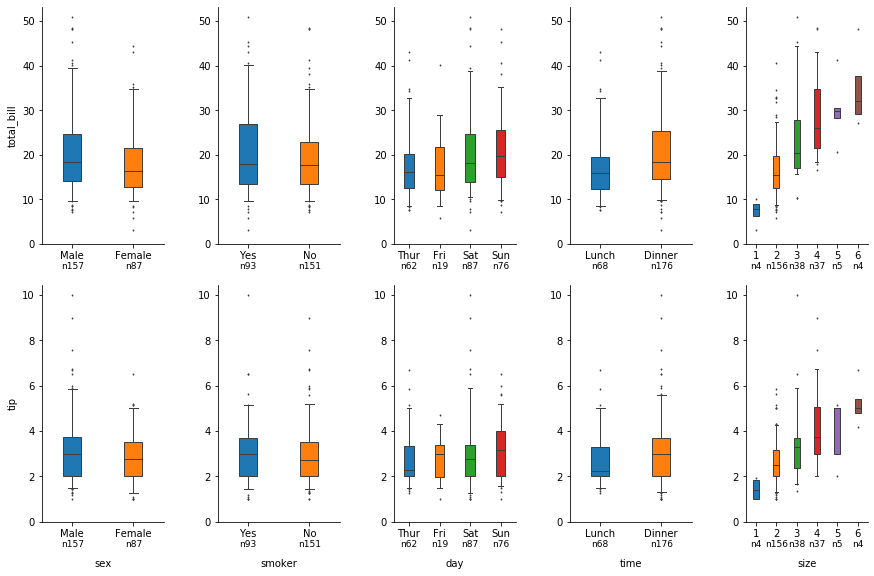

In [16]:
def boxgrid(df, nb_unique_limit=10):
    """
    Create grid of side-by-side boxplots with categorical and numerical discrete
    variables on the x axis and numerical continuous variables on the y axis.
    
    Parameters
    ----------
    df: pandas DataFrame
        DataFrame containing numerical continuous and categorical and/or
        numerical discrete variables.
    nb_unique_limit: integer, default=10
        Number of unique values used as a cut-off to maintain chart readability.
    """
    
    # select variables to plot
    var_num = df[[variable for variable in df if len(df[variable].unique()) > nb_unique_limit]]
    var_cat = df[[variable for variable in df if len(df[variable].unique()) <= nb_unique_limit]]
    
    nrows = len(var_num.columns)
    ncols = len(var_cat.columns)
    
    # create figure with required dimensions to fit all subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2.5, nrows*4))
    fig.tight_layout(pad=2)
    sns.despine()
    
    # draw boxplots with additional formatting
    for n, var_n in enumerate(var_num):
        for c, var_c in enumerate(var_cat):
            sns.boxplot(data=df, x=var_c, y=var_n,
                        whis=(5, 95), linewidth=1, width=0.3,
                        fliersize=1, saturation=1, ax=axes[n][c])
            
            ## additional formatting
            
            # create labels showing number of observations per group
            nobs = df.groupby(var_c)[var_n].count().values
            for x_position, nobs in enumerate(nobs):
                y_pos_factor = -0.1-0.005*nrows
                axes[n][c].text(x=x_position, y=y_pos_factor*df[var_n].max(), # x,y label position in data coordinates
                                s=f'n{nobs}',
                                horizontalalignment='center',
                                size=9)
            
            # remove y axis labels for plots not on grid edge
            if c > 0:
                axes[n][c].set(ylabel='')
            
            # remove x axis labels for plots not on grid edge
            if n < nrows-1:
                axes[n][c].set(xlabel='')
            
            # add padding for the x axis labels to avoid overlap with nobs labels
            else:
                axes[n][c].set_xlabel(axes[n][c].get_xlabel(), labelpad=20)
            
            # set bottom limit y axis at 0 to improve readability
            axes[n][c].set_ylim(0)

boxgrid(tips);

Key points regarding bills:
- As noted in an earlier figure (section 3), men seem to be paying larger bills than women.
- The sizes of bills paid by parties with at least one smoker are distributed slightly more widely than non-smoking parties.
- Bills increase with the weekend, with a slight dip on Friday which also counts significantly fewer observations than other days. To better understand these features it is necessary to also consider the time of day and party size. These factors will be examined further below.
- Bills are generally larger at dinner time.
- Bills increase with party size.

Key points regarding tips:
- In line with bills, men seem to tip slightly more.
- Tips paid by parties with at least one smoker are spread similarly to those from parties without smokers despite them paying slightly higher bills on average.
- The sizes of tips are similarly spread between days, despite bills increasing over the weekend.
- Dinner time tips are slightly larger that lunch time, in line with bills.
- Tips increase with party size, but it seems not as much as bills per additional person.

Any exact values represented in these plots can be extracted using the pandas *groupby* function. For example in the last plot bottom right, the line representing the median value for a group size 5 is not visible so it must be overlapping one of the edges of the box. The following function shows what this value is:

In [17]:
tips.groupby('size')['tip'].median()

size
1    1.42
2    2.50
3    3.29
4    3.76
5    5.00
6    5.00
Name: tip, dtype: float64

Further descriptive statistics can be obtained with the *describe* function. For example, for the chart on the bottom left:

In [18]:
tips.groupby('sex')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.09,1.49,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.83,1.16,1.0,2.0,2.75,3.50,6.5


# Categorical variables relationships

There are several ways to visualize associations between categorical variables. Using the function defined below, each categorical variable is displayed on two rows of bar charts except for one variable, the values of which are used to split the other variables into groups:
- The first row consists of grouped bar charts showing the absolute counts of each group for each variable.
- The second row shows the same groups but this time stacked and displayed as percentages (normalized stacked bar chart).

This makes it possible to visualize a lot of information in a small amount of space. The absolute counts show how many observations were made in each group (e.g. how many per day of the week) which helps provide more context on the data collection. The relative counts show the ratios between groups, which is more helpful for understanding the relationships between variables.

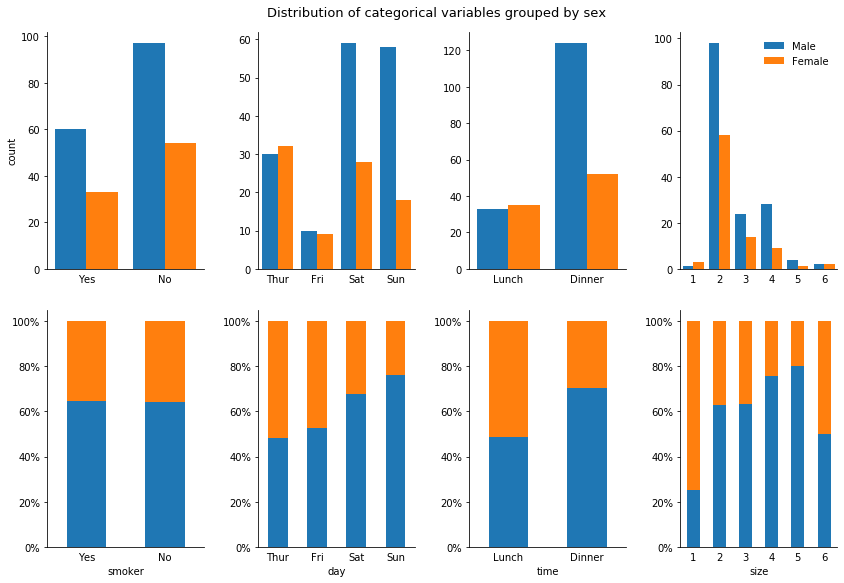

In [19]:
def bar_hue_sbs(df, hue, nb_unique_limit=10):
    """
    Create side-by-side bar charts for each categorical and numerical discrete
    variables within the dataset that contain a number of levels less or equal
    to the selected limit of unique values. Groups are created from the
    variable given as hue.
    
    Parameters
    ----------
    df: pandas DataFrame
        DataFrame containing categorical and/or numerical discrete variables.
    hue: str
        Name of variable contained in df used to create colored groups.
    nb_unique_limit: integer, default=10
        Number of unique values used as a cut-off to maintain chart readability.
    """
    
    # select variables to plot
    var_cat = df[[variable for variable in df if len(df[variable].unique()) <= nb_unique_limit]].drop(columns=hue)
    ncols = len(var_cat.columns)
    nrows = 2
    
    # create figure with required dimensions to fit all subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    fig.tight_layout(pad=2)
    sns.despine()
    fig.suptitle(f'Distribution of categorical variables grouped by {hue}',
                 verticalalignment='bottom',
                 fontsize=13)

    for i, var in enumerate(var_cat):
        # draw bar chart representing var_cat values count conditioned by the hue variable
        sns.countplot(x=var_cat[var], hue=df[hue], saturation=1, ax=axes[0][i])
        
        # draw the same values but as normalized stacked bars
        pd.crosstab(var_cat[var], df[hue])\
        .apply(lambda x: x*100/sum(x), axis=1)\
        .plot.bar(stacked=True, ax=axes[1][i]).tick_params(rotation=0)

        # additional formatting
        axes[1][i].yaxis.set_major_formatter(PercentFormatter(decimals=0))
        for row in range(nrows):
            # remove x axis tick marks
            axes[row][i].tick_params(which='major', axis='x', length=0, pad=5)
            
            # remove y axis labels from plots not on grid edge
            if i > 0:
                axes[row][i].set(ylabel='')
                
            # remove x axis labels from plots not on grid edge
            if row < nrows-1:
                axes[row][i].set(xlabel='')
            
            # add legend to upper right plot
            axes[row][i].legend(frameon=False)
            if i < ncols-1 or row==1:
                axes[row][i].legend().remove()

bar_hue_sbs(tips, 'sex')

Men pay the bill more often Saturday and Sunday, at dinner time and for any party size of 2 and above, though parties of 1, 5, or 6 people are quite rare so the ratios for those should not be considered as representative of the norm.

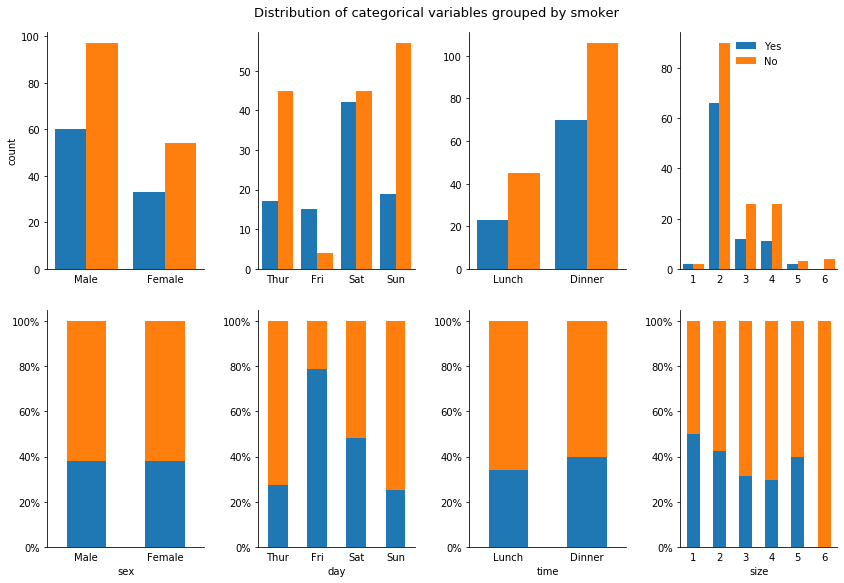

In [20]:
bar_hue_sbs(tips, 'smoker')

There are relatively more parties with smokers on Fridays and Saturdays compared to Thursdays and Sundays.

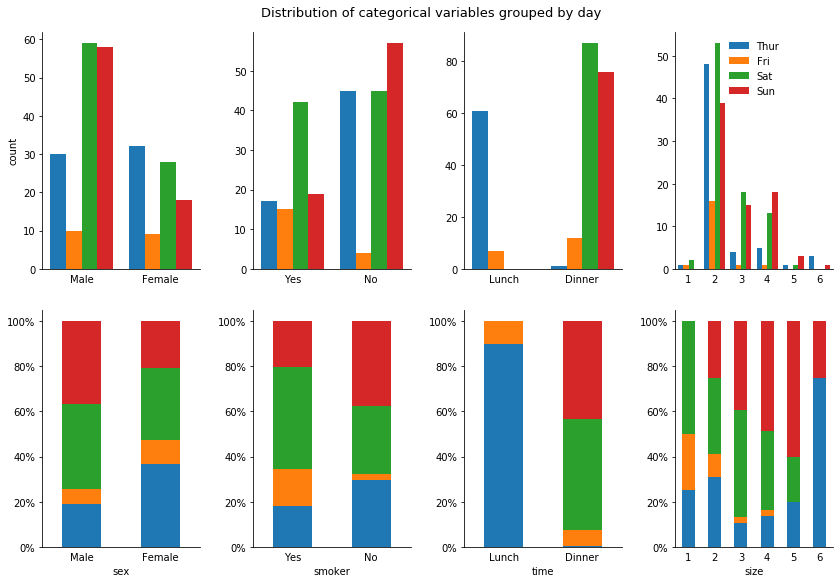

In [21]:
bar_hue_sbs(tips, 'day')

The two charts on the left reiterate features already uncovered. The third one brings some valuable new insights. The majority of observations were made at lunch time on Thursdays and at dinner time on Saturdays and Sundays. This suggests that the waiter who collected this data must have had most of his shifts at these times.

This also impacts how the insights gathered from this dataset should be evaluated. This shines a new light on the boxplot grid figure in section 4:
 - The amounts recorded for bills and tips at dinner time actually reflect mainly consumption habits on Saturdays and Sundays and vice-versa.
 - The lunch time observations reflect mainly consumption habits on Thursdays and vice-versa.
 - The observations from Fridays reflect both lunch time and dinner time consumption habits.

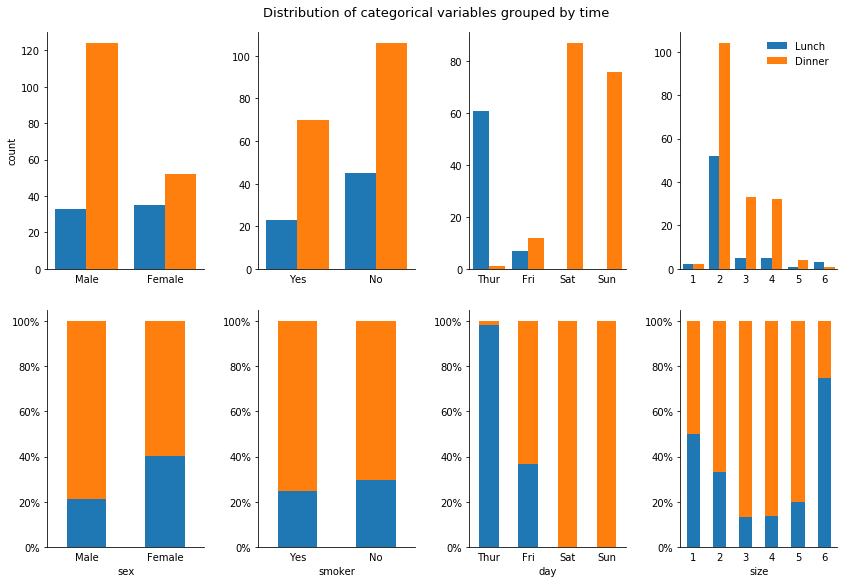

In [22]:
bar_hue_sbs(tips, 'time')

Again, men appear to pay the bill more often than women at dinner time (mainly on Saturdays and Sundays) compared to lunch time (mainly on Thursdays). Party sizes can be examined in the next figure.

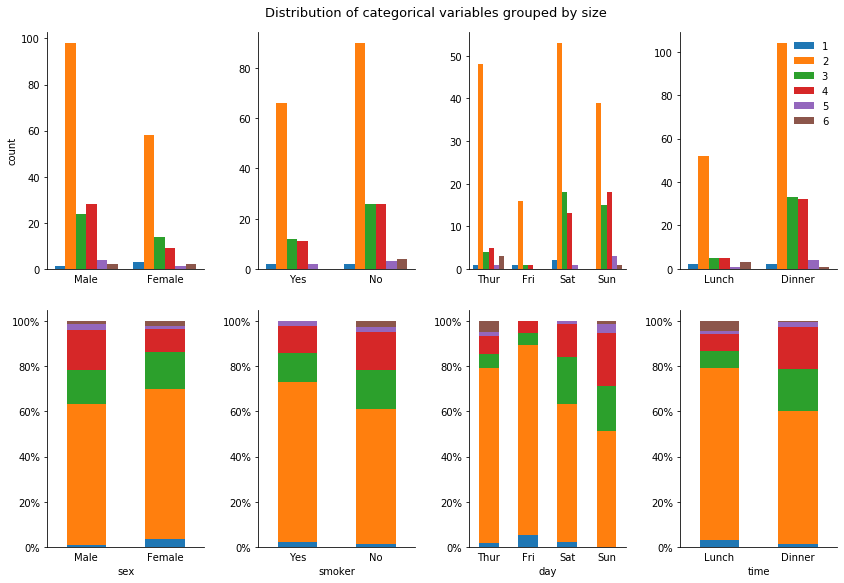

In [23]:
bar_hue_sbs(tips, 'size')

The last chart on the bottom right shows that lunch time (Thursdays mainly and Fridays) attracts mostly parties of two. Larger parties are more common at dinner on weekends.

# Further analysis

This last figure marks the end of the systematic part of this EDA. Many insights have been uncovered thanks to the systematic approach of visualizing the distributions of each variable as well as the relationships between all variables when analyzing them two-by-two. Proceeding in this way may help avoid missing interesting features in the dataset, compared to if the analysis had focused mainly on the variable of most interest that is the amount of tips. Indeed, the analysis of categorical variables has provided some useful contextual information.

The key points observed so far that relate to the size of tips can be summarized here (extracted from figures in sections 3 and 4):
- Tips, bill and size of parties are positively associated.
- Men give larger tips than women possibly due to the fact that the male/female bill payer ratio is larger for parties of 4 compared to parties of 2 and 3 (other party sizes are too few to have a significant impact).
- Parties with at least one smoker that have a large bill to pay tend to tip a bit less on average than non-smoker parties paying bills of a similar amount.
- Bills, and therefore tips, are higher at dinner compared to lunch which is explained by the fact that party sizes are larger at dinner.

Different steps can be taken to analyze the data further. One thing that can be done is to further study relationships between variables by further splitting groups and creating plots representing 3 or more variables. One case of displaying 3 variables has already been covered in section 3 where the scatter plots representing 2 numerical variables were split into colored groups according to each of the binary categorical variables. Another thing that can be done is to create new variables by transforming or combining the existing ones and see if new patterns emerge.

In the case of this dataset, it is obviously interesting to look at the size of tips relative to the bill. In the United States, tips in restaurants are expected to be at a rate of [15-20% of the bill](https://relocateusa.com/tipping-etiquette-in-the-united-states/). The scatter plots in section 3 showed that tips were well correlated with the bill but with some minor patterns of deviation. Visualizing the tip rate relative to the other categorical variables should help make some of those features observed much more obvious. Indeed, any pair of numerical variables as well correlated as *tip* and *total_bill* make good candidates for being combined into a single one. This makes it much easier to study the influence from other factors measured with categorical variables. 

This is why based on the observations made so far, it would be interesting to investigate the following questions regarding the tip rate:
1. Is the tip rate different depending on the sex of the bill payer?
2. Is there really a difference in tipping habits between smoker and non-smoker parties?
3. How does the tip rate change with party size?

To do this, first the tip rate must be computed. Then the visualizations produced for the numerical variables in sections 2 and 4 can be reproduced for this new variable.

In [11]:
# compute tip rate in percent of total bill
tips['tip_rate'] = tips['tip']/tips['total_bill']*100
tips['tip_rate'].describe()

count    244.00
mean      16.08
std        6.11
min        3.56
25%       12.91
50%       15.48
75%       19.15
max       71.03
Name: tip_rate, dtype: float64

The tip rate is closer to 15% than 20%, there is at least one very stingy person (6.1%) and one very generous person (71%).

In [12]:
interact(hist_interact,
         variable=fixed(tips['tip_rate']),
         xlabel=fixed('Tip rate (%)'),
         ylabel=fixed('Count'),
         title=fixed('Distribution of tip rates'),
         bins_width=wgt.FloatText(value=2.5, step=1,
                                  description='Bins width (%)',
                                  style = {'description_width': 'initial'}));

interactive(children=(FloatText(value=2.5, description='Bins width (%)', step=1.0, style=DescriptionStyle(desc…

The histogram highlights several extreme outliers. We can find out how they relate to the bill and tip size by drawing scatter plots.

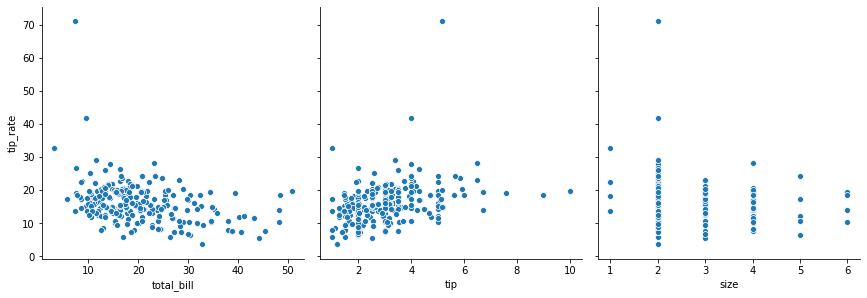

In [26]:
sns.pairplot(data=tips,
             y_vars=['tip_rate'],
             x_vars=tips.select_dtypes('number').drop(columns='tip_rate').columns.values,
             height=4, aspect=1);

The extreme tip rates (>30%) concern small bills only so they do not affect much the total tips received by the waiter. The tip rate decreases with bill and party sizes.

Next, the relationship between tip rate and the categorical variables can be visualized with side-by-side boxplots. The tip variable is shown again for comparison. Note that the three outliers above 30% are left out of the figures shown in the rest of this section to make it easier to see differences.

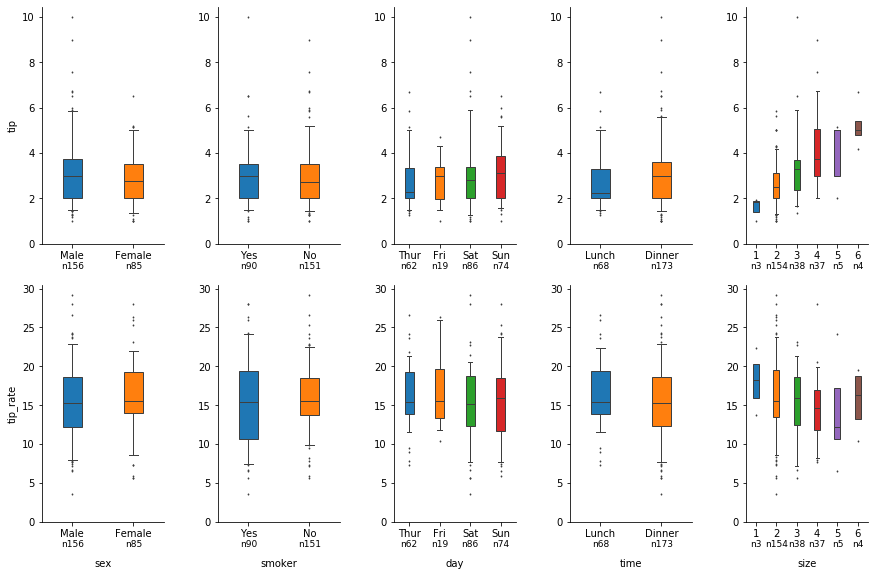

In [27]:
boxgrid(tips.loc[tips['tip_rate']<30].drop(columns=['total_bill']))

The following points can be made regarding the questions stated:
1. Men and women seem to tip at a very similar rate. But is this still true when we consider the time and day of when the bill was paid?
2. The median tip rate of smoker vs non-smoker parties is identical but there is a noticeable difference in the distribution of rates. Non-smoker parties tip at a more consistent rate. Do any of the other factors help explain this?
3. The tip rate decreases with party size. How does this inconsistent tip rate affect the total amount of tips received by the waiter?

A few extra figures can help provide answers to these additional questions.

## Question 1 - Men vs women tip rate

The following figure displays tip rates of male vs female bill payer depending on meal time and day of the week.

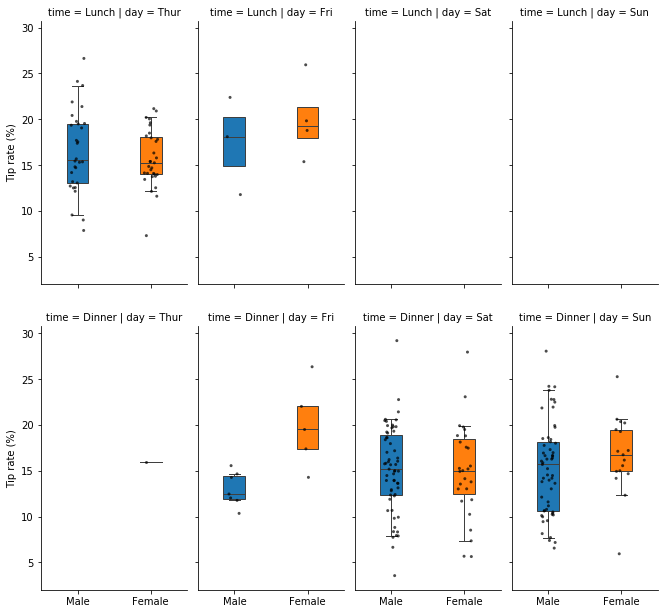

In [28]:
# create seaborn facetgrid to draw subplots according to time and day
g = sns.FacetGrid(data=tips[tips['tip_rate']<30], row='time', col='day')

# draw boxplots of tip rate by sex
g.map_dataframe(sns.boxplot, x='sex', y='tip_rate',
                whis=(5, 95), linewidth=1, width=0.3, fliersize=False,
                hue_order='sex', palette=sns.color_palette(), saturation=1)

# draw stripplots on top of boxplots
g.map_dataframe(sns.stripplot, x='sex', y='tip_rate',
                color='black', size=3, alpha=0.7)

# additional formatting
g.set_axis_labels('', 'Tip rate (%)')
plt.gcf().set_size_inches(9, 9);

The boxplots are overlaid with stripplots to show how many observations are represented by each boxplot seeing as the number of points per plot can be quite low once the observations are split into groups depending on time and day. This works well with this dataset seeing as it contains a small number of observations.

In line with the previous figure, there does not appear to be any notable difference in the average tip rate between men and women depending on the time and on the day. The data from Friday is too sparse to make a reliable conclusion, it would definitely be interesting to have more data from that day. The women appear to tip at a slightly more consistent rate than men, especially on Thursdays and Sundays.

## Question 2 - Smoker vs non-smoker parties tip rate

The following figure displays tip rates of smoker vs non-smoker parties depending on the meal time and the sex of the bill payer.

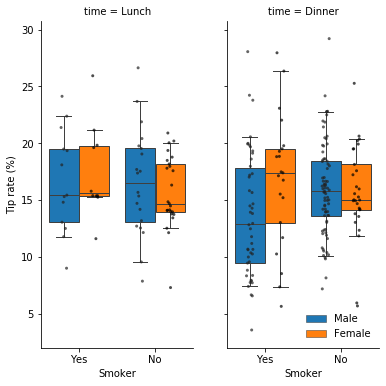

In [29]:
# create seaborn facetgrid to draw subplots according to time
g = sns.FacetGrid(data=tips[tips['tip_rate']<30], col='time')

# draw boxplots of tip rate by smoker status and sex
g.map_dataframe(sns.boxplot, x='smoker', y='tip_rate', dodge=True,
                whis=(5, 95), linewidth=1, fliersize=False,
                hue='sex', palette=sns.color_palette(), saturation=1)

# draw stripplots on top of boxplots
g.map_dataframe(sns.stripplot, x='smoker', y='tip_rate', dodge=True,
                hue='sex', color='black', size=3, alpha=0.7)

# additional formatting
g.set_axis_labels('Smoker', 'Tip rate (%)')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels[:2], frameon=False)
plt.gcf().set_size_inches(6, 6)
plt.gcf().tight_layout(pad=3);

Lunch time tip rates (on Thursdays and Fridays) show no clear difference between smoker and non-smoker parties. Dinner time rates (on Saturdays and Sundays) show that non-smoker parties tip at a more consistent rate, with men who appear to tip at higher rate than men in smoker parties. Women from non-smoker parties have the most consistent tip rate and they seem to have the tendency to tip at a rate either close to 15% or close to 20%, as points seem to cluster near those values.

To further explore factors potentially affecting the tip rate according to smoker status, the plots can be split according to *size*. The only remaining categorical variable *day* is already well represented by *time* so it will not be considered further.

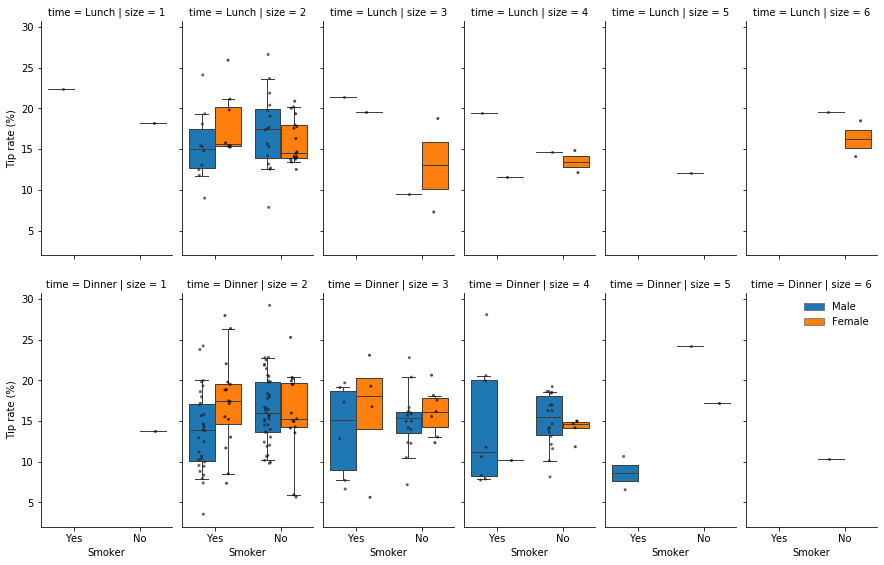

In [30]:
# create seaborn facetgrid to draw subplots according to size and time
grid = sns.FacetGrid(data=tips[tips['tip_rate']<30], col='size', row='time')

# draw boxplots of tip rate by smoker status
grid.map_dataframe(sns.boxplot, x='smoker', y='tip_rate', dodge=True,
                   hue='sex', palette=sns.color_palette(),
                   whis=(5, 95), linewidth=1, fliersize=False, saturation=1)

# draw stripplots with hue by sex
grid.map_dataframe(sns.stripplot, x='smoker', y='tip_rate',
                   dodge=True, hue='sex', color='black', size=3, alpha=0.7, label='')

# additional formatting
grid.set_axis_labels('Smoker', 'Tip rate (%)')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels[:2], frameon=False)
plt.gcf().set_size_inches(12, 8);

Tip rates are most consistent for non-smoker parties of 3 and 4 people, falling closely around 15%. Regarding parties of 2 people, again it appears that tip rates of women from non-smoker parties cluster at 15% and 20%. Most plots have too few points to extract reliable information, which illustrates the limits of small multiples when analyzing a small dataset.

## Question 3 - Impact of tip rate decrease with size of party

To begin exploring this issue, it is interesting to first get some more context on how the tips are distributed between parties of different sizes. We can start by looking at how the median tips vary by party size and compare that to the median bill paid, on a per person basis. The median is used rather than the average to remove the effect from extreme outliers.

In [31]:
# create dataframe containing median values by party size
tips_median = tips.groupby('size').median()
tips_median.columns = ['total_bill_median', 'tip_median', 'tip_rate']
tips_median

,total_bill_median,tip_median,tip_rate
size,,,
1,7.92,1.42,20.28
2,15.37,2.50,15.61
3,20.36,3.29,15.93
4,25.89,3.76,14.67
5,29.85,5.00,12.14
6,32.05,5.00,16.29


In [32]:
# create dataframe containing median values of bill and tip on a per person basis
tips_per_person = tips_median.divide(tips['size'].sort_values().unique(), axis='index')
tips_per_person['tip_rate'] = tips_per_person['tip_rate']*tips['size'].sort_values().unique()
tips_per_person.columns = ['bill_per_person', 'tip_per_person', 'tip_rate']
tips_per_person

,bill_per_person,tip_per_person,tip_rate
size,,,
1,7.92,1.42,20.28
2,7.69,1.25,15.61
3,6.79,1.10,15.93
4,6.47,0.94,14.67
5,5.97,1.00,12.14
6,5.34,0.83,16.29


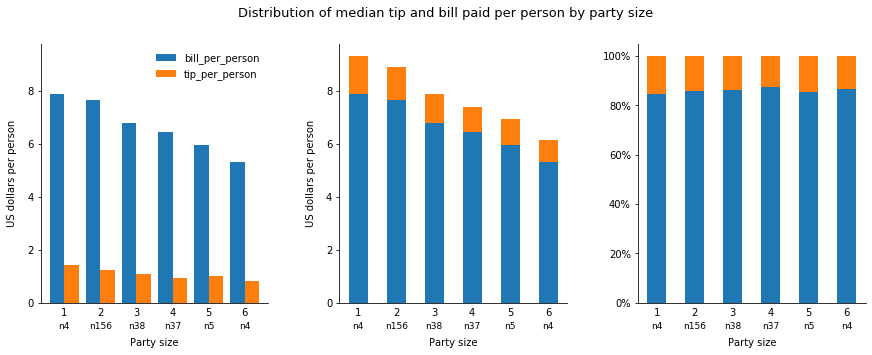

In [33]:
# create figure of bar charts representing median bill and median tip paid per person by party size
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
fig.tight_layout(pad=4)
fig.suptitle(f'Distribution of median tip and bill paid per person by party size',
             fontsize=13)

# draw bar charts
tips_per_person.plot.bar(y=['bill_per_person', 'tip_per_person'],
                         width=0.8, legend='Bill per person', ax=axes[0])

tips_per_person.plot.bar(y=['bill_per_person', 'tip_per_person'],
                         stacked=True, ax=axes[1])

tips_per_person.drop(columns='tip_rate')\
               .apply(lambda x: x*100/sum(x), axis=1)\
               .plot.bar(y=['bill_per_person', 'tip_per_person'],
                         stacked=True, ax=axes[2])

# additional formatting
sns.despine()
for ax in axes:
    ax.legend().remove()
    ax.set_xlabel('Party size', size=10, labelpad=20)
    ax.set_ylabel('US dollars per person', labelpad=10)
    ax.tick_params(which='major', axis='x', length=0, pad=5, rotation=0)

axes[0].set_ylim(axes[1].get_ylim())
axes[0].legend(frameon=False)
axes[2].set_ylabel('')
axes[2].yaxis.set_major_formatter(PercentFormatter(decimals=0))

# create labels on x axis showing number of observations per group
for ax in axes:
    nobs = tips.groupby('size')['size'].count().values
    for x_position, nobs in enumerate(nobs):
        ax.text(x=x_position, y=-0.1*max(ax.get_ylim()), # x,y label position in data coordinates
                s=f'n{nobs}',
                horizontalalignment='center',
                size=9)

The median tip and bill paid per person decrease with party size. A possible explanation in the decrease of median bill per person is that larger parties tend to be families with children who consume less on average than adults. The last chart shows that. relative to the bill. the tip decreases a bit with party size, as previously illustrated with boxplots. We can take a closer look at this in the next figure.

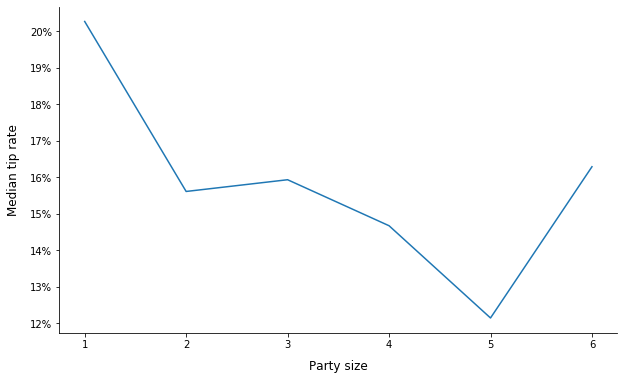

In [34]:
# draw graph of median tip rate by party size
ax = tips_per_person.plot.line(y='tip_rate')
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.set_xlabel('Party size', size=12, labelpad=10)
ax.set_ylabel('Median tip rate', size=12, labelpad=10)
ax.legend().remove()
sns.despine();

Note that the tip rates shown here are obtained by extracting the median rates by party from the original table. The rates reflected by the difference in shares shown in the stacked bar chart above are obtained after stacking the median bill and median tip per person, which gives a slightly different result (representing non-observed median tip rates).

Contrary to the boxplots shown earlier, taking the median tip rate alone makes the decrease from party size 2 to 4 less apparent seeing as the rate actually increases a bit from 2 to 3. Nevertheless, looking at the rates in this way makes differences between party sizes look rather significant, which brings us back to the initial question: how much does this inconsistent tip rate affect the total tips of the waiter? A Pareto chart comes in handy in such a situation.

In [35]:
# create dataframe containing total tips by party size and sort in descending order
tips_sum = tips.drop(columns='tip_rate').groupby('size').sum().reset_index().sort_values('tip', ascending=False)
tips_sum['size'] = tips_sum['size'].apply(str) # change data type for charting issue
tips_sum = tips_sum.set_index('size')
tips_sum.columns = ['total_bill_sum', 'tip_sum']
tips_sum

,total_bill_sum,tip_sum
size,,
2,2565.89,402.84
4,1058.70,153.01
3,884.55,128.94
6,139.32,20.90
5,150.34,20.14
1,28.97,5.75


In [36]:
# compute cumulative percentage of total tips
tips_sum['tip_cumul_pc'] = 100*tips_sum['tip_sum'].cumsum()/tips_sum['tip_sum'].sum()
tips_sum

,total_bill_sum,tip_sum,tip_cumul_pc
size,,,
2,2565.89,402.84,55.06
4,1058.70,153.01,75.98
3,884.55,128.94,93.60
6,139.32,20.90,96.46
5,150.34,20.14,99.21
1,28.97,5.75,100.00


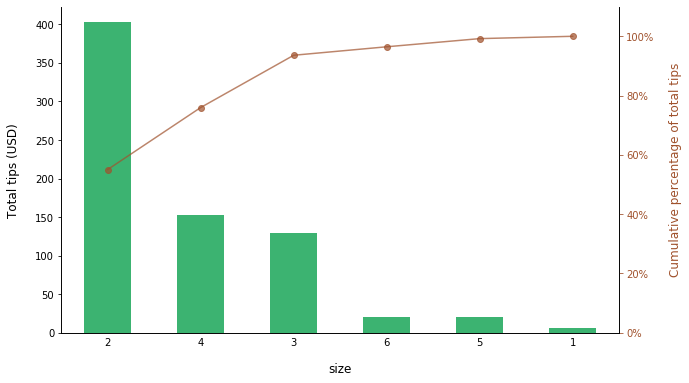

In [37]:
# create Pareto chart of cumulative tips by party size
# code based on https://stackoverflow.com/questions/53577630/how-to-make-pareto-chart-in-python
fig, ax = plt.subplots()

# draw bar chart total tips by party size
ax_bar = tips_sum.plot.bar(use_index=True, y='tip_sum',
                           color='mediumseagreen',
                           ax=ax)
ax_bar.set_ylabel('Total tips (USD)', size=12, labelpad=15)
ax_bar.set_xlabel('Party size', size=12, labelpad=15)

# draw graph of cumulative percentage
ax_line = tips_sum.plot.line(use_index=True, y='tip_cumul_pc',
                             marker='o', color='sienna', alpha=0.7,
                             ax=ax, secondary_y=True)
ax_line.set_ylim([0,110])
ax_line.tick_params(axis='y', colors='sienna')
ax_line.yaxis.set_major_formatter(PercentFormatter())
ax_line.set_ylabel('Cumulative percentage of total tips',
                   color='sienna', size=12, labelpad=15)

# additional formatting
ax.tick_params(which='major', axis='x', length=0, pad=5)
ax.legend().remove()
sns.despine(right=False);

Most of the tips are earned from parties of 2 to 4 people, slightly more than half of which come from parties of 2. We know that parties of 3 and 4 tip at a slightly different median rate than parties of 2, so the next point to investigate is what difference does this make with regards to total tips: how much would the total tips change if everyone would tip at a consistent rate regardless of party size? To answer this, the median tip rate of parties of 2 can be used as a benchmark.

In [38]:
# assign median tip rate for parties of 2
tip_rate_2p = tips_median['tip_rate'][2]
tip_rate_2p

15.610417599597449

In [39]:
# compute total theoretical tips at median rate of parties of 2 by party size
tip_2p_rate_sum = tips.assign(tip_2p_rate_sum=lambda tips: tips['total_bill']*tip_rate_2p/100)\
                      .groupby('size').sum()['tip_2p_rate_sum']
tip_2p_rate_sum.index = tip_2p_rate_sum.index.astype(str)
tip_2p_rate_sum

size
1      4.52
2    400.55
3    138.08
4    165.27
5     23.47
6     21.75
Name: tip_2p_rate_sum, dtype: float64

In [40]:
# merge total theoretical tips with table of Pareto chart
tips_2p = tips_sum.merge(tip_2p_rate_sum, left_index=True, right_index=True)
tips_2p

,total_bill_sum,tip_sum,tip_cumul_pc,tip_2p_rate_sum
size,,,,
2,2565.89,402.84,55.06,400.55
4,1058.70,153.01,75.98,165.27
3,884.55,128.94,93.60,138.08
6,139.32,20.90,96.46,21.75
5,150.34,20.14,99.21,23.47
1,28.97,5.75,100.00,4.52


In [41]:
# compute cumulative percentage of total theoretical tips
tips_2p['tip_2p_rate_cumul_pc'] = 100*tips_2p['tip_2p_rate_sum'].cumsum()/tips_2p['tip_2p_rate_sum'].sum()
tips_2p

,total_bill_sum,tip_sum,tip_cumul_pc,tip_2p_rate_sum,tip_2p_rate_cumul_pc
size,,,,,
2,2565.89,402.84,55.06,400.55,53.15
4,1058.70,153.01,75.98,165.27,75.08
3,884.55,128.94,93.60,138.08,93.40
6,139.32,20.90,96.46,21.75,96.29
5,150.34,20.14,99.21,23.47,99.40
1,28.97,5.75,100.00,4.52,100.00


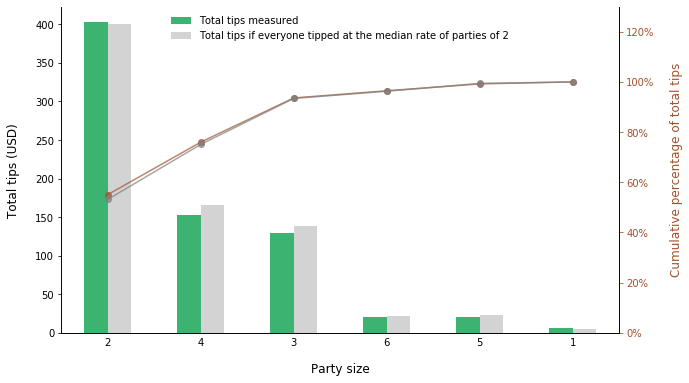

In [42]:
# create Pareto chart of total tips measured compared to total theoretical tips
# if everyone tipped at the median rate of parties of 2

fig, ax = plt.subplots()

# draw bar chart of benchmark (theoretical) total tips and measured total tips by party size
ax_bar = tips_2p.plot.bar(use_index=True, y=['tip_sum', 'tip_2p_rate_sum'],
                          color=['mediumseagreen', 'lightgrey'],
                          label=['Total tips measured',
                                 'Total tips if everyone tipped at the median rate of parties of 2'],
                          ax=ax)
# draw graph of benchmark and measured cumulative percentages
ax_line = tips_2p.plot.line(use_index=True, y=['tip_cumul_pc', 'tip_2p_rate_cumul_pc'],
                            marker='o', color=['sienna', 'grey'], alpha=0.7,
                            ax=ax, secondary_y=True)
ax_line.set_ylim([0,130])
ax_line.set_ylabel('Cumulative percentage of total tips', color='sienna', size=12, labelpad=15)
ax_line.tick_params(axis='y', colors='sienna')
ax_line.yaxis.set_major_formatter(PercentFormatter())

# additional formatting
ax.set_xlabel('Party size', size=12, labelpad=15)
ax.set_ylabel('Total tips (USD)', size=12, labelpad=15)
ax.tick_params(which='major', axis='x', length=0, pad=5, rotation=0)
ax.legend(frameon=False, loc='upper center')
sns.despine(right=False);

Applying a consistent median tip rate to all party sizes produces some differences in total tips per party size but nothing very significant. Indeed, effects from applying a different tip rate to the original bills, which vary a lot between parties of the same size (in addition to the tip rate, see boxplots section 4), end up being somewhat balanced out. The changes to total tips for party sizes of 3 and 4 are noticeable but not that much more than the change to the total tips of party size 2 that is purely due to the effects from applying a different tip rate to bills that vary a lot within that group.

Also, the median rates of party sizes 2-4 happen to be quite similar despite the tip rate boxplots (displayed at the beginning of section 6) showing a clear downward trend. It is quite possible that if more data was collected on parties of 3 and 4, the differences in median tip rate would become more apparent, causing a more significant impact on total tips by party size.

This last figure marks the end of the further analysis concerning the research questions. It has provided useful insights regarding the tip rate and how it varies (or not) according to other factors recorded in the dataset. The key observations made can be summarized here again:
 - Probably the most important point that was made apparent is that people tend to tip at around 15%  rather than more between 15 and 20%.
 - The median tip rate is not significantly affected by sex and smoker status, though women bill payers in non-smoker parties do appear to have the most consistent tip rate.
 - The bill and tip per person decrease with party size. This could be due to children being part of the larger parties. Or maybe it is a restaurant where it is common to share dishes between people.
 - The decrease in tip rate with party size does not seem to cause a large loss of profit in tips when using the median tip rate of parties of 2 as a benchmark. The impact may well become more apparent with more data. If it does, it would have to be put in perspective with other considerations such as time and effort spent serving tables relative to party size.

# Conclusion

The analysis of this dataset on restaurant tips has provided many insights. The main points are that obviously tips increase with the bill, though not at the same rate. The tip rate decreases slightly with party size. Overall, people tip mostly around 15% of the bill, meaning they are generally more stingy than generous with regards to the 15-20% rate recommended in the United States. The per person consumption decreases with party size, meaning the restaurant and therefore the waiter earn less per chair occupied by larger parties. Whether this is an issue or not depends on the resources needed to serve larger parties vs smaller ones on a per person basis. To evaluate this, more data is needed, especially information on time spent serving each table. 

Information on additional factors may also bring new insights. For example it could be interesting to know the sex of all members in parties as well as the number of children. Above all, it would be interesting to obtain more complete data covering all the shifts of the week, including the hours spent per shift. Gathering new data would also make it possible to carry out statistical tests to see whether any of the differences uncovered are statistically significant. This could then help both the waiter and the restaurant owner take some steps to increase profit.

The exploratory data analysis carried out on this sample dataset illustrates how much knowledge can be gained by using a systematic approach to studying all the variables, even with a small and somewhat sparse dataset such as this one. Doing this in Jupyter Notebook using Python makes it easy to follow each step. It also makes it easy to repeat the process with another dataset that would contain a similar variety of types of variables. The systematic part of the EDA in sections 2 to 5 helps ensure that no significant feature in the dataset is missed. As shown with this example, it also helps shape interesting research questions for further analysis. This is what makes Jupyter Notebook a valuable tool for analyzing data and efficiently extracting valuable insights.